# Mask Classification

## Dependencies

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

# Import the dependencies.
# OpenCV to open Images
import cv2
# MTCNN to detect faces
from mtcnn import MTCNN

# TensorFlow and tf.keras
# https://www.tensorflow.org/api_docs/python/tf/keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model, load_model

# Helper libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow Libraries Matter for Speed!!!
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.4.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6600131894843085669
]


# Detecting Masks

## CV2

In [2]:
# Load in once of the well performing models from the checkpoints directory.
#model = load_model("./model_checkpoints/model-009.model")
model = load_model("./model_checkpoints/model-009.model", compile=True)
# Load in the face detection classifier for CV2
face_clsfr = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# Load in the eye detection classifier for CV2
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

# Label and color in RGB for the frame
labels_dict = {0: "Yes", 1: "No"}
color_dict = {0: (0, 255, 0), 1: (0, 0, 255)}

In [3]:
test_path_one = "../data/external/test/maksssksksss0.png"
test_path_two = "../data/external/test/maksssksksss273.png"
test_path_three = "../data/external/test/maksssksksss299.png"
test_path_four = "../data/external/test/maksssksksss306.png"

# Prediction Function
# Needs to be CONVERTED to an API style module.
# Generate a prediction with loaded model
def predictor(requestedImage):
    #image = tf.keras.preprocessing.image.load_img(requestedImage, color_mode="grayscale")
    #input_arr = tf.keras.preprocessing.image.img_to_array(image)
    #input_arr = np.array([input_arr])  # Convert single image to a batch.
    #predictions = model.predict(input_arr)
    #print(predictions)
    img = cv2.cvtColor(cv2.imread(requestedImage), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(cv2.imread(requestedImage), cv2.COLOR_BGR2GRAY)
    faces = face_clsfr.detectMultiScale(gray, 1.3, 5)
    print(faces)

    for (x, y, w, h) in faces:
        # Find face,
        face_img = gray[y : y + w, x : x + w]
        # resize the shape,
        resized = cv2.resize(face_img, (100, 100))
        # normailze from 255 to 0-1,
        normalized = resized / 255.0
        # reshape to "tensor shape 1 x inputSize x inputSize x 1",
        # batch size, width, height, RGB data,
        reshaped = np.reshape(normalized, (1, 100, 100, 1))
        print(reshaped.shape)
        #  pass into model,
        result = model.predict(reshaped)
        # print out the model's prediction result
        print(result[0])

        # Adding the label based off of result[0]
        print(
            "Not wearing a face mask" if result[0][0] > 0.5 else "Wearing a face mask"
        )

        if result[0][0] > 0.5:
            label = 1
            print(label)
            # Draw the rectangle around the face of the person in frame
            # Passed in the color and text dicts from the previous cell
            cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
            cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
            cv2.putText(
                img,
                labels_dict[label],
                (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8,
                (255, 255, 255),
                2,
            )
        else:
            label = 0
            print(label)
            # Draw the rectangle around the face of the person in frame
            # Passed in the color and text dicts from the previous cell
            cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
            cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
            cv2.putText(
                img,
                labels_dict[label],
                (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8,
                (255, 255, 255),
                2,
            )

        plt.imshow(img)
        plt.show()

    # close the window
    cv2.destroyAllWindows()


[[310  82  58  58]]
(1, 100, 100, 1)
[0.988277   0.01172298]
Not wearing a face mask
1


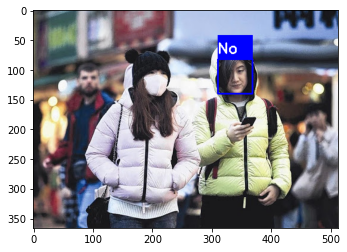

In [4]:
# Test the prediction fucntion
predictor(test_path_one)

In [5]:
# Test the prediction fucntion
predictor(test_path_two)

()


[[ 36 171 151 151]]
(1, 100, 100, 1)
[0.90189815 0.09810182]
Not wearing a face mask
1


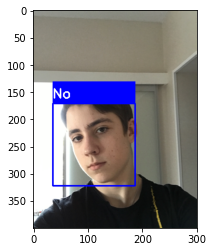

In [6]:
# Test the prediction fucntion
predictor(test_path_three)

In [7]:
# Test the prediction fucntion
predictor(test_path_four)

()


## CV2 Eyes

In [8]:
# Prediction Eyes
def predictor_eyes(requestedImage):
    img = cv2.cvtColor(cv2.imread(requestedImage), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(cv2.imread(requestedImage), cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.05, 5)
    print(eyes)

    if eyes is not ():
        # Find face, resize the shape, pass into model
        # face_img = gray[y : y + w, x : x + w]
        # resized = cv2.resize(face_img, (100, 100))
        resized = cv2.resize(gray, (100, 100))
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1, 100, 100, 1))
        result = model.predict(reshaped)
        print(result[0])

        # Adding the label based off of result[0]
        print(
            "Not wearing a face mask" if result[0][0] > 0.65 else "Wearing a face mask"
        )

        plt.imshow(img)
        plt.show()

    # close the window
    cv2.destroyAllWindows()


[[335  90  22  22]
 [177 323  23  23]
 [  8 334  22  22]]
[0.00220185 0.9977982 ]
Wearing a face mask


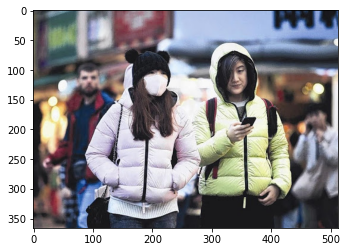

In [9]:
# Test the prediction fucntion
predictor_eyes(test_path_one)

[[ 86 169  35  35]
 [198 106  37  37]
 [195 187  47  47]
 [201  74  43  43]
 [ 52  50  50  50]
 [186  11  52  52]]
[0.00299943 0.9970005 ]
Wearing a face mask


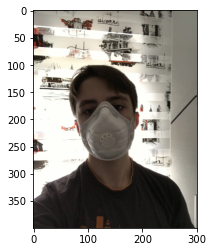

In [10]:
# Test the prediction fucntion
predictor_eyes(test_path_two)

[[ 64 216  37  37]
 [105 201  38  38]]
[0.07063032 0.9293697 ]
Wearing a face mask


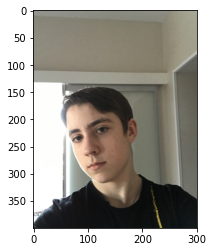

In [11]:
# Test the prediction fucntion
predictor_eyes(test_path_three)

In [12]:
# Test the prediction fucntion
predictor_eyes(test_path_four)

()


## MTCNN

In [13]:
# MTCNN
detector = MTCNN()


def crop_image(im, x, y, w, h):
    return im[y : (y + h), x : (x + w), :]


# Display one image
def display_one(a, title1="Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()


# Prediction MTCNN
def predictor_mtcnn(requestedImage):
    # load the image
    data = cv2.imread(requestedImage)
    # plot the image
    plt.imshow(data)
    # detector
    result_list = detector.detect_faces(data)
    print(result_list)
    box = result_list[0]
    display_one(crop_image(data, *box["box"]))

    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result["box"]
        crop = crop_image(data, *result["box"])
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100, 100))
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1, 100, 100, 1))
        outcome = model.predict(reshaped)
        print(outcome[0])
        # Adding the label based off of outcome[0]
        print(
            "Not wearing a face mask" if outcome[0][0] > 0.65 else "Wearing a face mask"
        )

        if outcome[0][0] > 0.5:
            label = 1
        else:
            label = 0

        # draw the box
        cv2.rectangle(data, (x, y), (x + width, y + height), color_dict[label], 2)
        cv2.rectangle(data, (x, y - 40), (x + width, y), color_dict[label], -1)
        cv2.putText(
            data,
            labels_dict[label],
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (255, 255, 255),
            2,
        )
        # show the image
        cv2.imshow("mask detection", data)
        # keep the window open until we press a key
        cv2.waitKey(0)

    # show the plot
    plt.show()


[{'box': [318, 82, 42, 57], 'confidence': 0.9532291293144226, 'keypoints': {'left_eye': (328, 104), 'right_eye': (348, 102), 'nose': (338, 116), 'mouth_left': (331, 127), 'mouth_right': (349, 124)}}, {'box': [76, 100, 31, 35], 'confidence': 0.9441289305686951, 'keypoints': {'left_eye': (87, 113), 'right_eye': (102, 114), 'nose': (95, 120), 'mouth_left': (89, 127), 'mouth_right': (100, 128)}}]


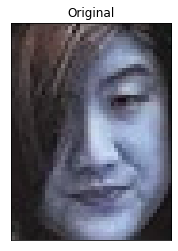

[0.9697196  0.03028036]
Not wearing a face mask
[0.96571624 0.03428378]
Not wearing a face mask


In [14]:
# Test the prediction fucntion
predictor_mtcnn(test_path_one)

[{'box': [76, 128, 108, 144], 'confidence': 0.8285725116729736, 'keypoints': {'left_eye': (99, 181), 'right_eye': (148, 177), 'nose': (120, 207), 'mouth_left': (108, 243), 'mouth_right': (145, 240)}}]


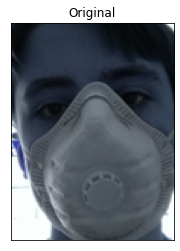

[0.9704021  0.02959792]
Not wearing a face mask


In [15]:
# Test the prediction fucntion
predictor_mtcnn(test_path_two)

[{'box': [63, 177, 112, 138], 'confidence': 0.9991361498832703, 'keypoints': {'left_eye': (81, 234), 'right_eye': (128, 220), 'nose': (98, 261), 'mouth_left': (98, 289), 'mouth_right': (136, 279)}}]


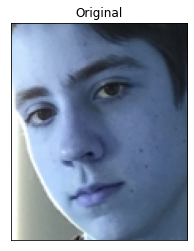

[0.8842363  0.11576375]
Not wearing a face mask


In [16]:
# Test the prediction fucntion
predictor_mtcnn(test_path_three)

[{'box': [144, 164, 108, 140], 'confidence': 0.9771899580955505, 'keypoints': {'left_eye': (168, 212), 'right_eye': (217, 216), 'nose': (183, 243), 'mouth_left': (167, 276), 'mouth_right': (203, 280)}}]


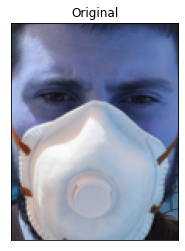

[1.3140969e-04 9.9986863e-01]
Wearing a face mask


In [17]:
# Test the prediction fucntion
predictor_mtcnn(test_path_four)